In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import butter, lfilter

In [28]:
#Read data from CSV datafile
dataset = pd.read_excel("data.xlsx", usecols=[10,11]) 
array_data = np.array(dataset);
array_data = array_data[:30000]

In [29]:
#x is time, y is RED
x = np.array([i*0.02 for i in range(0,30000)]);
y = array_data[:,1];

In [30]:
#Functions for Butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [31]:
#Filter RED data for Heart Rate (0.5-2 Hz)
y_HR = butter_bandpass_filter(y[:], 0.4, 1.4,50, order=5)

In [32]:
from scipy.signal import argrelmax, argrelextrema

#Finding the index of peaks for heart rate
peakindex_HR = argrelextrema(y_HR, np.greater)

#Storing the peaks and corresponding times for Heart rate
peaks_HR = [y_HR[i] for i in peakindex_HR]
time_HR = [x[i] for i in peakindex_HR]

In [33]:
#Calculating denominators for Heart Rate formula - distance between two peaks
HR_diff = [peakindex_HR[0][i+1] - peakindex_HR[0][i] for i in range(len(peakindex_HR[0])-1)]
#print HR_diff

#Calculating heart rate
HR_array = []
for i in HR_diff:
    HR_array.append(3000.0/i);    #Instantaneous Heart rate

#Heart rate
print "Average Heart Rate: ", np.around(np.mean(HR_array[2:]),4)

HR_range = [elem for elem in np.array(HR_array) if elem > 50 and elem<95]
print "Instantaneous Heart Rate: "
#print '\n'.join('{}'.format(item,4) for item in HR_range)
print "Percentage of data considered: ",100*float(len(HR_range))/len(HR_array)
print "Average of range considered: ",np.mean(HR_range)

Average Heart Rate:  70.0961
Instantaneous Heart Rate: 
58.8235294118
83.3333333333
78.9473684211
62.5
75.0
78.9473684211
66.6666666667
50.8474576271
85.7142857143
65.2173913043
71.4285714286
52.6315789474
53.5714285714
83.3333333333
62.5
73.1707317073
63.829787234
60.0
57.6923076923
78.9473684211
63.829787234
83.3333333333
81.0810810811
76.9230769231
73.1707317073
63.829787234
66.6666666667
66.6666666667
69.7674418605
65.2173913043
68.1818181818
78.9473684211
69.7674418605
73.1707317073
68.1818181818
88.2352941176
71.4285714286
52.6315789474
78.9473684211
53.5714285714
66.6666666667
73.1707317073
90.9090909091
66.6666666667
88.2352941176
68.1818181818
78.9473684211
81.0810810811
75.0
88.2352941176
63.829787234
85.7142857143
65.2173913043
85.7142857143
81.0810810811
66.6666666667
69.7674418605
69.7674418605
78.9473684211
73.1707317073
78.9473684211
85.7142857143
78.9473684211
78.9473684211
83.3333333333
75.0
73.1707317073
71.4285714286
83.3333333333
76.9230769231
73.1707317073
83.33333

In [34]:
#Filtering for Respiration rate
y_R = butter_bandpass_filter(y[:], 0.2, 0.5, 50, order=5)

#Finding index of peaks for Respiration rate
peakindex_R = argrelextrema(y_R, np.greater)

#Finding peaks and corresponding times for Respiration rate
peaks_R = [y_R[i] for i in peakindex_R]
time_R = [x[i] for i in peakindex_R]

In [35]:
#print time_R

#Finding respiration rate
R_array = []
R_diff = [time_R[0][i+1] - time_R[0][i] for i in range(len(time_R[0])-1)]
for i in R_diff:
    R_array.append(60/i)    #Instantaneous

print "Instantaneous Respiration Rate: "
#print '\n'.join('{}'.format(item,4) for item in R_array[1:])
#Average
print "Average respiration rate: ", np.around(np.mean(R_array[1:]),4)

Instantaneous Respiration Rate: 
16.8539325843
17.1428571429
17.2413793103
16.7597765363
17.3410404624
17.2413793103
17.3410404624
17.3410404624
17.0454545455
17.4418604651
17.5438596491
17.0454545455
17.2413793103
17.2413793103
17.4418604651
17.0454545455
17.2413793103
17.2413793103
17.3410404624
17.0454545455
17.2413793103
16.8539325843
17.2413793103
17.1428571429
17.2413793103
17.4418604651
16.9491525424
17.0454545455
17.3410404624
17.3410404624
17.2413793103
17.1428571429
17.0454545455
17.3410404624
17.4418604651
17.3410404624
17.3410404624
17.4418604651
17.2413793103
17.1428571429
17.4418604651
17.3410404624
17.2413793103
17.4418604651
17.1428571429
17.2413793103
17.2413793103
17.0454545455
17.1428571429
16.8539325843
17.2413793103
17.2413793103
16.7597765363
17.3410404624
17.3410404624
17.1428571429
17.4418604651
16.7597765363
17.1428571429
17.2413793103
17.1428571429
17.3410404624
17.0454545455
17.0454545455
17.5438596491
17.2413793103
17.2413793103
17.0454545455
17.0454545455
1

In [36]:
#SPO2 calculation

#Already calculated max peaks for RED (peaks_HR, time_HR)
#Applying filter
upper = 1.5
order = 2
y_RED = butter_bandpass_filter(y[:], 0.001, upper, 50, order)

#Finding index of peaks for RED
peakindex_RED = argrelextrema(y_RED, np.greater)

#Calculating peaks and corresponding times for RED
peaks_RED = [y_RED[i] for i in peakindex_RED]
time_RED = [x[i] for i in peakindex_RED]

#Finding min peaks index for RED
peakindex_RED_min = argrelextrema(y_RED, np.less)
peaks_RED_min = [y_RED[i] for i in peakindex_RED_min]
time_RED_min = [x[i] for i in peakindex_RED_min]

In [37]:
#Interpolating min peaks for RED to find DC at time_HR
DC_RED = np.interp(time_RED[0], time_RED_min[0], peaks_RED_min[0])

#Calculating AC for RED values
AC_RED = peaks_RED[0] - DC_RED

In [38]:
#z is IR values
z = array_data[:,0];

#Applying filter
z_IR = butter_bandpass_filter(z[:], 0.001, upper, 50, order)

#Finding index of peaks for IR
peakindex_IR = argrelextrema(z_IR, np.greater)

#Calculating peaks and corresponding times for IR
peaks_IR = [z_IR[i] for i in peakindex_IR]
time_IR = [x[i] for i in peakindex_IR]

#Finding index of min peaks for IR
peakindex_IR_min = argrelextrema(z_IR, np.less)

#Finding peaks and corresponding times for min IR peaks
peaks_IR_min = [z_IR[i] for i in peakindex_IR_min]
time_IR_min = [x[i] for i in peakindex_IR_min]

In [39]:
#Interpolating min peaks for RED to find DC at time_IR
DC_IR = np.interp(time_IR[0], time_IR_min[0], peaks_IR_min[0])

#Calculating AC for IR values
AC_IR = peaks_IR[0] - DC_IR

In [40]:
#Calculating ratio average
#Finding if RED/ IR has lesser number of peaks
length = 0
if len(AC_RED) < len(DC_IR):
    length = len(AC_RED)
else:
    length = len(DC_IR)
        
num = AC_RED[0:length]*DC_IR[0:length]
den = AC_IR[0:length]*DC_RED[0:length]

ratio_avg = num/den
#ratio_avg = den/num

In [41]:
spo2 = -45.060*ratio_avg*ratio_avg+30.354*ratio_avg+94.845

spo2_range = [elem for elem in np.array(spo2) if elem > 90 and elem < 100]
print "Instantaneous SPO2: " 
#print '\n'.join('{}'.format(item,4) for item in spo2_range)
print "Percentage of data considered: ",100*float(len(spo2_range))/len(spo2)
print "Average of SPO2 considered: ",np.mean(spo2_range)

Instantaneous SPO2: 
95.7811814
96.4744829512
95.8979323118
98.6520058723
98.1793356214
91.4567848928
91.0992883673
91.8695903812
91.4142619029
91.8847145276
94.6807244441
94.7125093977
94.1260171175
93.9653747568
93.3784482063
94.0827196412
90.4206595843
94.4391751293
94.8171108142
94.8386093381
94.8587544029
95.767429072
94.9574616202
94.8596691004
96.8014372018
97.10866771
96.6128870936
99.9493848232
98.6719176202
98.2382970327
96.9767390185
95.9997019002
95.0986660874
96.0505283334
94.9370106131
95.0763583882
99.9516860937
95.6735035476
99.953955311
95.4624924205
97.6001143361
95.7492236889
95.7524878335
95.8519204241
99.7476627341
95.6361466079
98.9347312991
99.781214898
98.5248880173
99.6271011132
96.8696042239
96.4100958738
91.7405943559
94.9721459818
94.9766251552
96.5366368048
98.0845155769
94.9338082734
97.5222070181
95.1339847618
99.941748368
98.1674998356
96.893289593
99.9487805531
95.7778914382
96.5567716522
99.2202679977
96.5728929197
99.2932422408
99.9443227001
98.902186

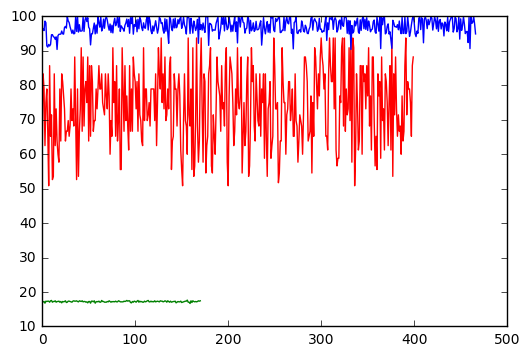

In [42]:
x_range = [i for i in range(len(HR_range))]
plt.plot(x_range, HR_range, 'r')

x_range = [i for i in range(len(R_array)-1)]
plt.plot(x_range, R_array[1:], 'g')

x_range = [i for i in range(len(spo2_range))]
plt.plot(x_range, spo2_range, 'b')

plt.show()